<a href="https://colab.research.google.com/github/danielahernandez29/Curso-IA/blob/main/Multicapa/Clasificacion_de_la_flor_de_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= =====

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7256 - loss: 0.5789 - val_accuracy: 0.9667 - val_loss: 0.1792
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9385 - loss: 0.2002 - val_accuracy: 0.9667 - val_loss: 0.1116
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9752 - loss: 0.1286 - val_accuracy: 0.9000 - val_loss: 0.2703
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9298 - loss: 0.2950 - val_accuracy: 1.0000 - val_loss: 0.0264
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9165 - loss: 0.1533 - val_accuracy: 1.0000 - val_loss: 0.0220
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9278 - loss: 0.1632 - val_accuracy: 0.9667 - val_loss: 0.1481
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9725 - loss: 0.1319 - val_accuracy: 0.9667 - val_loss: 0.0817
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9729 - loss: 0.0873 - val_accuracy: 0.9667 - val_

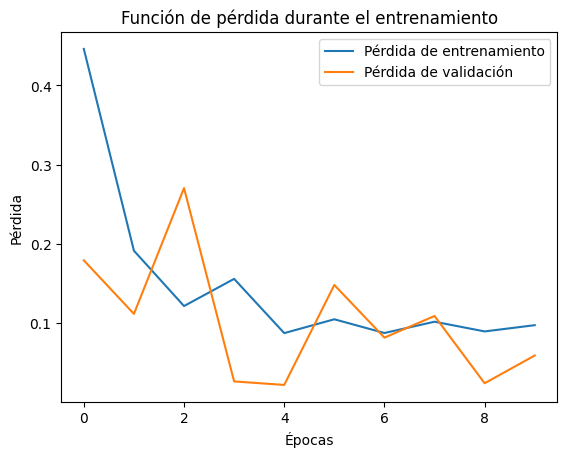

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.9667 - loss: 0.0591
Loss: 0.05911516770720482, Accuracy: 0.9666666388511658
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
   Actual Class Index Actual Flower  Predicted Class Index Predicted Flower
0                   1    versicolor                      1       versicolor
1                   0        setosa                      0           setosa
2                   2     virginica                      2        virginica
3                   1    versicolor                      1       versicolor
4                   1    versicolor                      1       versicolor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


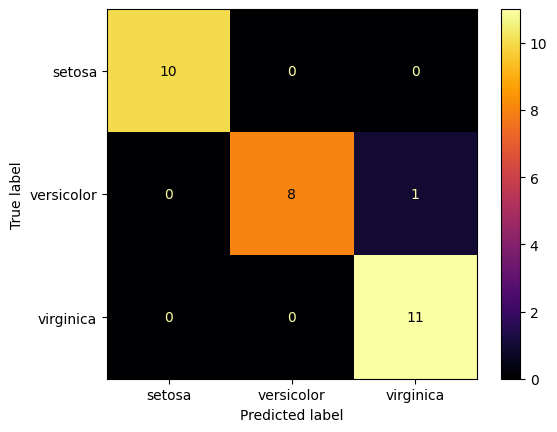

Sensitivity (Recall) for each class:
Class 0: 1.0
Class 1: 0.8888888888888888
Class 2: 1.0


In [2]:
"""Este programa crea y entrena una red neuronal multicapa para clasificar la flor de iris"""
# Se ocupo
# tensorflow y keras: para construir y entrenar la red neuronal.
# matplotlib: para visualización de datos.
# numpy: para operaciones numéricas.
# pandas: para manipulación y análisis de datos.

import matplotlib.pyplot as plt

 # Primero cargamos el conjunto de datos de iris
from sklearn.datasets import load_iris
iris = load_iris()

print(iris.keys())

print(iris.DESCR)

# Ocupamos algunas de estas llaves:
iris.target_names
iris.target
iris.data
iris.feature_names

# Se crea un dataframe con pandas para mejorar la manipulación de los datos
import pandas as pd

iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_df

iris_df.describe()

# Definimos X e y
X = iris_df
y = pd.get_dummies(iris.target).values

# Separamos los datos para los conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=42
)

print(X_train.shape)
print(X_test.shape)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definimos nuestra red neuronal multicapa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

modelo = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax'),
])

# Creamos el optimizador Adam con una tasa de aprendizaje personalizada
from tensorflow.keras.optimizers import Adam

# Ponemos la tasa de aprendizaje deseada
learning_rate = 0.01
adam_optimizer = Adam(learning_rate=learning_rate)

modelo.compile(
    optimizer=adam_optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Se Entrena el modelo
history = modelo.fit(
    X_train, y_train,
    epochs=10, batch_size=1,
    validation_data=(X_test, y_test)
)

# se graficamos la función de pérdida
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()

# Evaluamos el modelo en el conjunto de prueba
loss, accuracy = modelo.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

import numpy as np


# Hago las predicciones finales con mis datos de prueba. Esto da las probabilidades
predictions = modelo.predict(X_test)
# Convierto las probabilidades a la clase que ganó
predicted_classes = np.argmax(predictions, axis=1)
# Hago lo mismo con los valores reales  para poder comparar.
actual_classes = np.argmax(y_test, axis=1)

# Con en el dataFrame nos deja ver que tan bien le fue a mi modelo
comparison = pd.DataFrame({'Actual Class Index': actual_classes, 'Predicted Class Index': predicted_classes})

comparison['Actual Flower'] = [iris.target_names[i] for i in actual_classes]
comparison['Predicted Flower'] = [iris.target_names[i] for i in predicted_classes]

comparison = comparison[['Actual Class Index', 'Actual Flower', 'Predicted Class Index', 'Predicted Flower']]
print(comparison.head()) # Muestro cómo le fue a las primeras flores.

# Matriz de Confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

# Vuelvo a predecir
y_pred = modelo.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculo la Matriz de Confusión
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Calculo la sensibilidad
sensitivity = recall_score(y_test_classes, y_pred_classes, average=None)

# Visualizo la Matriz de Confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='inferno') # Uso un color bonito.
plt.show() #


print('Sensitivity (Recall) for each class:')
for i in range(3):
    print(f'Class {i}: {sensitivity[i]}')